In [1]:
from astropy.table import Table, Column
from astropy.io import fits
import numpy as np
import astropy.units as u
from astropy.constants import G, sigma_sb, c

import warnings
warnings.filterwarnings('ignore')

In [2]:
%run Binary_Data_Clean.py
%run Binary_Fraction.py

I've already done a lot of the table clean stuff, so the only thing left to do right now is to add the RV values

In [3]:
Tables = Binary_Data_Clean('/home/cody/Binary Search/2nd_Data_Set/allMC.avg.58247.nocut.fits','/home/cody/Binary Search/2nd_Data_Set/allVisit-t9-l31c-58247.mc.fits',
                          '/home/cody/Binary Search/parsec_decamsdss_all.fits.gz')

In [ ]:
AllAvg, AllVis, ISO = Tables.load_tables()

In [ ]:
AllVis = Tables.too_fast(AllVis)
AllAvgSimp, AllVisSimp = Tables.nvisits_cut(AllAvg,AllVis)
AAS_RG = Tables.rg_cut(AllAvgSimp)

In [ ]:
AAS_RG_ISO = Tables.iso_fit(AAS_RG, ISO)

In [ ]:
AllAvg_LMC = Tables.mc_cut(AAS_RG_ISO, 'L')
AllAvg_SMC = Tables.mc_cut(AAS_RG_ISO, 'S')

In [ ]:
AllAvg_LMC.write('aas_rgb_lmc_NORV', format = 'fits')
AllAvg_SMC.write('aas_rgb_smc_NORV', format = 'fits')

In [ ]:
AllAvgSimp.write('AllAvgSimp.fits', format = 'fits')
AllVisSimp.write('AllVisSimp.fits', format = 'fits')

You can jump to this cell if you've already saved the LMC/SMC average filmes and the AllVisSimp tables.

In [4]:
AllAvg_LMC = Table(fits.getdata('/home/cody/Binary Search/aas_rgb_lmc_NORV',1))
AllAvg_SMC = Table(fits.getdata('/home/cody/Binary Search/aas_rgb_smc_NORV',1))

AllAvgSimp = Table(fits.getdata('/home/cody/Binary Search/AllAvgSimp.fits', 1))
AllVisSimp = Table(fits.getdata('/home/cody/Binary Search/AllVisSimp.fits', 1))

In [5]:
AllAvg_LMC_RV = Tables.rv_table_add(AllAvg_LMC,AllVisSimp)
AllAvg_SMC_RV = Tables.rv_table_add(AllAvg_SMC,AllVisSimp)

In [6]:
thing_LMC = Binary_Fraction(AllAvg_LMC_RV)
thing_SMC = Binary_Fraction(AllAvg_SMC_RV)

In [7]:
b_frac = np.array([0,1])
detection_rate_LMC_200_UP = []
for i in b_frac:
    p_value_result_LMC_200_UP, binary_result_LMC_200_UP = thing_LMC.Master(200,'U', True, False, i, 10)
    detection_rate_LMC_200_UP.append(np.count_nonzero(binary_result_LMC_200_UP)/len(binary_result_LMC_200_UP))

detection_rate_SMC_200_UP = []
for i in b_frac:
    p_value_result_SMC_200_UP, binary_result_SMC_200_UP = thing_SMC.Master(200, 'U', True, False, i, 10)
    detection_rate_SMC_200_UP.append(np.count_nonzero(binary_result_SMC_200_UP)/len(binary_result_SMC_200_UP))

In [8]:
import matplotlib.pyplot as plt
real_data_detection_LMC, binary_bool_LMC = thing_LMC.Real_Data_Fraction()
real_data_detection_SMC, binary_bool_SMC = thing_SMC.Real_Data_Fraction()
LMC_binary_detection = np.count_nonzero(real_data_detection_LMC)/len(real_data_detection_LMC)
SMC_binary_detection = np.count_nonzero(real_data_detection_SMC)/len(real_data_detection_SMC)

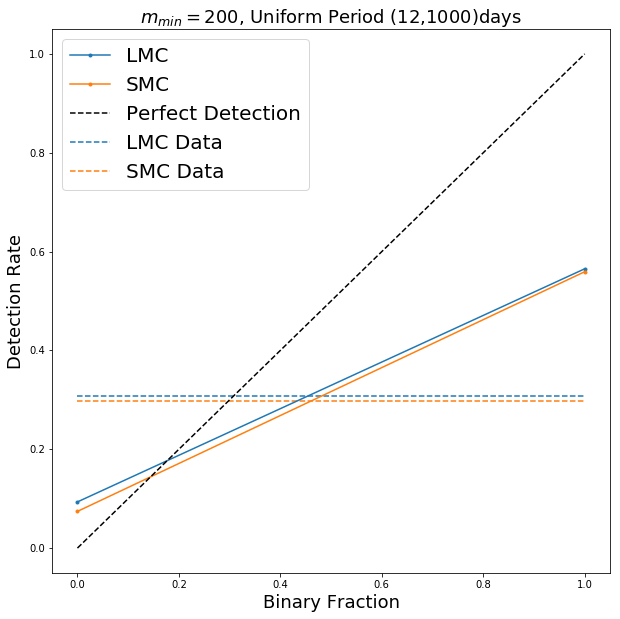

In [10]:
plt.figure(figsize = (10,10))
plt.plot(b_frac, detection_rate_LMC_200_UP,'.-', color = 'C0', label = 'LMC')
plt.hlines(LMC_binary_detection, 0 ,1, color = 'C0', linestyles='dashed', label = 'LMC Data')
plt.plot(b_frac, detection_rate_SMC_200_UP, '.-', color = 'C1', label = 'SMC')
plt.hlines(SMC_binary_detection, 0 ,1, color = 'C1', linestyles='dashed', label = 'SMC Data')
plt.plot([0,1],[0,1],'--', color = 'black',label = 'Perfect Detection')
plt.xlabel('Binary Fraction', size = 18)
plt.ylabel('Detection Rate', size = 18)
plt.title('$m_{min} = 200$, Uniform Period (12,1000)days', size = 18)
plt.legend(prop = {'size': 20})
plt.show()

In [49]:
len(binary_result_LMC_200_UP)

61900

In [ ]:
len(binary_result_SMC_200_UP)

In [ ]:
SMC_binary_detection

In [11]:
detection_rate_LMC_200_LN = []
for i in b_frac:
    p_value_result_LMC_200_LN, binary_result_LMC_200_LN = thing_LMC.Master(200,'L', True, False, i, 10)
    detection_rate_LMC_200_LN.append(np.count_nonzero(binary_result_LMC_200_LN)/len(binary_result_LMC_200_LN))

detection_rate_SMC_200_LN = []
for i in b_frac:
    p_value_result_SMC_200_LN, binary_result_SMC_200_LN = thing_SMC.Master(200, 'L', True, False, i, 10)
    detection_rate_SMC_200_LN.append(np.count_nonzero(binary_result_SMC_200_LN)/len(binary_result_SMC_200_LN))

In [12]:
plt.figure(figsize = (10,10))
plt.plot(b_frac, detection_rate_LMC_30_UP,'.-', color = 'C0', label = 'LMC')
plt.hlines(LMC_binary_detection, 0 ,1, color = 'C0', linestyles='dashed', label = 'LMC Data')
plt.plot(b_frac, detection_rate_SMC_30_UP, '.-', color = 'C1', label = 'SMC')
plt.hlines(SMC_binary_detection, 0 ,1, color = 'C1', linestyles='dashed', label = 'SMC Data')
plt.plot([0,1],[0,1],'--', color = 'black',label = 'Perfect Detection')
plt.xlabel('Binary Fraction', size = 18)
plt.ylabel('Detection Rate', size = 18)
plt.title('$m_{min} = 30$, Uniform Period 12,1000', size = 18)
plt.legend(prop = {'size': 20})
plt.show()

NameError: name 'detection_rate_LMC_30_UP' is not defined

<Figure size 720x720 with 0 Axes>

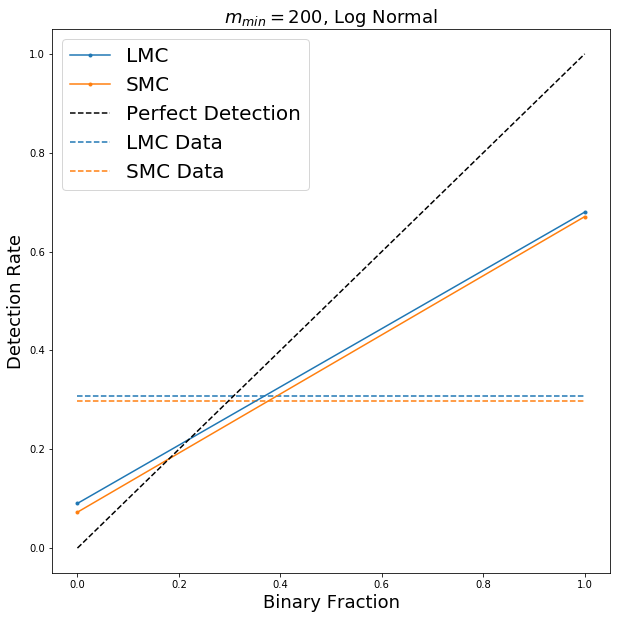

In [13]:
fig = plt.figure(figsize = (10,10))
plt.plot(b_frac, detection_rate_LMC_200_LN,'.-', color = 'C0', label = 'LMC')
plt.hlines(LMC_binary_detection, 0 ,1, color = 'C0', linestyles='dashed', label = 'LMC Data')
plt.plot(b_frac, detection_rate_SMC_200_LN, '.-', color = 'C1', label = 'SMC')
plt.hlines(SMC_binary_detection, 0 ,1, color = 'C1', linestyles='dashed', label = 'SMC Data')
plt.plot([0,1],[0,1],'--', color = 'black',label = 'Perfect Detection')
plt.xlabel('Binary Fraction', size = 18)
plt.ylabel('Detection Rate', size = 18)
plt.title('$m_{min} = 200$, Log Normal', size = 18)
plt.legend(prop = {'size': 20})
plt.show()

# Adjusting the detection rate
When looking at the real data for the LMC and SMC the detection rate is, 

In [14]:
LMC_detection = np.count_nonzero(real_data_detection_LMC)
SMC_detection = np.count_nonzero(real_data_detection_SMC)
print(np.count_nonzero(real_data_detection_LMC),np.count_nonzero(real_data_detection_SMC))

381 111


Out of a total number of LMC and SMC stars,

In [52]:
print(len(AllAvg_LMC_RV),len(AllAvg_SMC_RV))

1238 373


From our synthetic signals the false possitive rate is,

In [53]:
LMC_false = detection_rate_LMC_200_UP[0]
SMC_false = detection_rate_SMC_200_UP[0]
print(detection_rate_LMC_200_UP[0], detection_rate_SMC_200_UP[0])

0.09432956381260096 0.07211796246648794


So we want to subtract off that percentage of detections. We don't know which ones are 'false' detections but we should just subtract off 9 or 7% of the detections

In [54]:
LMC_detection - LMC_detection*LMC_false

345.06043618739903

But we also need to add on detections. Becasue even at 100% binary fraction we only have a detection rate of around,

In [55]:
LMC_miss = 1-detection_rate_LMC_200_UP[1]
SMC_miss = 1-detection_rate_SMC_200_UP[1]
print(1-detection_rate_LMC_200_UP[1], 1-detection_rate_SMC_200_UP[1])

0.4384168012924071 0.4418230563002681


So we are going to be missing a good number of binaries. So we should look at the number of stars that were not in binaries and add on that number of stars. 

In [56]:
LMC_detection - LMC_detection*LMC_false + (len(AllAvg_LMC_RV)-LMC_detection)*LMC_miss

720.783634894992

So this should be the correct number of binaries in the data set, giving a binary fraction of,

In [58]:
real_LMC_detection_rate = 718/len(AllAvg_LMC_RV)
real_LMC_detection_rate

0.5799676898222941

In [ ]:
plt.figure(figsize = (10,10))
plt.plot(b_frac, detection_rate_LMC_200_UP,'.-', color = 'C0', label = 'LMC')
plt.hlines(LMC_binary_detection, 0 ,1, color = 'C0', linestyles='dashed', label = 'LMC Data')
plt.vlines(real_LMC_detection_rate, 0 ,1, color = 'C2', linestyles='dashed', label = 'Real? LMC Data')
plt.plot(b_frac, detection_rate_SMC_200_UP, '.-', color = 'C1', label = 'SMC')
plt.hlines(SMC_binary_detection, 0 ,1, color = 'C1', linestyles='dashed', label = 'SMC Data')
plt.plot([0,1],[0,1],'--', color = 'black',label = 'Perfect Detection')
plt.xlabel('Binary Fraction', size = 18)
plt.ylabel('Detection Rate', size = 18)
plt.title('$m_{min} = 200$, Uniform Period 12,1000', size = 18)
plt.legend(prop = {'size': 20})
plt.show()

# 2dHist
I want to make the 2dhist I had on the poster so....lets figure out how to do that

In [ ]:
LMC_Fake_Table_L = thing_LMC.Synthetic_Table(200,'L',True,False,10)
LMC_Fake_Table_U = thing_LMC.Synthetic_Table(200,'U',True,False,10)

Done with loop 0
Done with loop 1
Done with loop 2
Done with loop 3


All the crap below here is stuff from my older codes. I don't remember how this works but it makes a nice histogram of the acceptance paramiters so I haven't messed with it. At some point I should go through this and make it less of an abomination

In [ ]:
BTF_a_SMC = []
BTF_mi_SMC = []

BTF_a_no_SMC = []
BTF_mi_no_SMC = []

BTF_a_all_SMC = SMC_Fake_Table['a']
m_all_SMC = SMC_Fake_Table['m']*u.jupiterMass
m_all_SMC = m_all_SMC.to(u.solMass)
m_all_SMC = m_all_SMC.value

i_all_SMC = SMC_Fake_Table['i']

BTF_mi_all_SMC = m_all_SMC * np.sin(i_all_SMC)

for n in range(len(SMC_Fake_Table)):
    if SMC_Fake_Table["Binary"][n]:
        BTF_a_SMC.append(SMC_Fake_Table['a'][n])
        m = SMC_Fake_Table['m'][n]*u.jupiterMass
        m = m.to(u.solMass)
        m = m.value
        
        i = SMC_Fake_Table['i'][n]
        BTF_mi_SMC.append(m*np.sin(i))
    else:
        BTF_a_no_SMC.append(SMC_Fake_Table['a'][n])
        m = SMC_Fake_Table['m'][n]*u.jupiterMass
        m = m.to(u.solMass)
        m = m.value
        i = SMC_Fake_Table['i'][n]
        BTF_mi_no_SMC.append(m*np.sin(i))
fig, ax = plt.subplots(1,1, figsize = (20,10))      
ax.scatter(BTF_a_SMC, BTF_mi_SMC, label = 'accepted',alpha = 0.4)
ax.scatter(BTF_a_no_SMC, BTF_mi_no_SMC,alpha = 0.4, label = 'rejected')
ax.set_title('Detection Rate of Synthetic Binaries SMC',fontsize = 18)
ax.set_ylabel('$m*\sin(i)$', fontsize = 18)
ax.set_xlabel('$a$ (AU)', fontsize = 18)
ax.set_xscale('log')
#ax.set_yscale('log')
ax.legend()        

In [ ]:
#BTF_mi_all_SMC = BTF_mi_all_SMC*u.jupiterMass
#BTF_mi_all_SMC = BTF_mi_all_SMC.to(u.solMass)
#BTF_mi_all_SMC = BTF_mi_all_SMC.value
H_all, xed,yed, image = plt.hist2d(BTF_a_all_SMC,BTF_mi_all_SMC, bins = [np.logspace(-1.5,1.3,40), np.linspace(0,1.5,40) ])


#BTF_mi_SMC = BTF_mi_SMC*u.jupiterMass
#BTF_mi_SMC = BTF_mi_SMC.to(u.solMass)
#BTF_mi_SMC = BTF_mi_SMC.value
H_ac, xed2,yed2,image2 = plt.hist2d(BTF_a_SMC,BTF_mi_SMC, bins = [np.logspace(-1.5,1.3,40), np.linspace(0,1.5,40) ])

fig = plt.figure(figsize=(14,10))
#plt.hist2d(H_ac/(H_all+0.001), bins =[np.logspace(-1,1,5), np.linspace(0,1000,5) ] )
#plt.xscale("log")
#plt.xlabel('a (AU)')
#plt.ylabel('$m*\sin(i)$')
##plt.yscale('log')
#plt.colorbar()
#plt.show()
X, Y = np.meshgrid(xed, yed)
plt.pcolormesh(X, Y, H_ac.T/(H_all.T+0.001))
plt.xscale("log")
plt.xlabel('a (AU)', fontsize = 30)
plt.ylabel('$m*\sin(i)$  $(M_{\odot})$',fontsize = 30)
plt.title('Detection Rate of Synthetic Binaries (SMC)', fontsize = 30)
plt.tick_params(axis='both',which = 'major', labelsize = 26)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize = 18)
fig.savefig('detection binary hist SMC.png')

In [ ]:
BTF_a_LMC = []
BTF_mi_LMC = []

BTF_a_no_LMC = []
BTF_mi_no_LMC = []

BTF_a_all_LMC = LMC_Fake_Table['a']
m_all_LMC = LMC_Fake_Table['m']*u.jupiterMass
m_all_LMC = m_all_LMC.to(u.solMass)
m_all_LMC = m_all_LMC.value

i_all_LMC = LMC_Fake_Table['i']

BTF_mi_all_LMC = m_all_LMC * np.sin(i_all_LMC)

for n in range(len(LMC_Fake_Table)):
    if LMC_Fake_Table["Binary"][n]:
        BTF_a_LMC.append(LMC_Fake_Table['a'][n])
        m = LMC_Fake_Table['m'][n]*u.jupiterMass
        m = m.to(u.solMass)
        m = m.value
        
        i = LMC_Fake_Table['i'][n]
        BTF_mi_LMC.append(m*np.sin(i))
    else:
        BTF_a_no_LMC.append(LMC_Fake_Table['a'][n])
        m = LMC_Fake_Table['m'][n]*u.jupiterMass
        m = m.to(u.solMass)
        m = m.value
        i = LMC_Fake_Table['i'][n]
        BTF_mi_no_LMC.append(m*np.sin(i))
fig, ax = plt.subplots(1,1, figsize = (20,10))      
ax.scatter(BTF_a_LMC, BTF_mi_LMC, label = 'accepted',alpha = 0.4)
ax.scatter(BTF_a_no_LMC, BTF_mi_no_LMC,alpha = 0.4, label = 'rejected')
ax.set_title('Detection Rate of Synthetic Binaries LMC',fontsize = 18)
ax.set_ylabel('$m*\sin(i)$', fontsize = 18)
ax.set_xlabel('$a$ (AU)', fontsize = 18)
ax.set_xscale('log')
#ax.set_yscale('log')
ax.legend()        

In [ ]:
#BTF_mi_all_SMC = BTF_mi_all_SMC*u.jupiterMass
#BTF_mi_all_SMC = BTF_mi_all_SMC.to(u.solMass)
#BTF_mi_all_SMC = BTF_mi_all_SMC.value
H_all, xed,yed, image = plt.hist2d(BTF_a_all_LMC,BTF_mi_all_LMC, bins = [np.logspace(-2,1.5,40), np.linspace(0,1.6,40) ])


#BTF_mi_SMC = BTF_mi_SMC*u.jupiterMass
#BTF_mi_SMC = BTF_mi_SMC.to(u.solMass)
#BTF_mi_SMC = BTF_mi_SMC.value
H_ac, xed2,yed2,image2 = plt.hist2d(BTF_a_LMC,BTF_mi_LMC, bins = [np.logspace(-2,1.5,40), np.linspace(0,1.6,40) ])

fig = plt.figure(figsize=(14,10))
#plt.hist2d(H_ac/(H_all+0.001), bins =[np.logspace(-1,1,5), np.linspace(0,1000,5) ] )
#plt.xscale("log")
#plt.xlabel('a (AU)')
#plt.ylabel('$m*\sin(i)$')
##plt.yscale('log')
#plt.colorbar()
#plt.show()
X, Y = np.meshgrid(xed, yed)
plt.pcolormesh(X, Y, H_ac.T/(H_all.T+0.001))
plt.xscale("log")
plt.xlabel('a (AU)', fontsize = 30)
plt.ylabel('$m*\sin(i)$  $(M_{\odot})$',fontsize = 30)
plt.title('Detection Rate of Synthetic Binaries (LMC)', fontsize = 30)
plt.tick_params(axis='both',which = 'major', labelsize = 26)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize = 18)
fig.savefig('detection binary hist LMC.png')

I want to look at the period distribution of Uniform vs log normal. I'm surprised the lognormal distribution gives a higher acceptance rate at 1 than the uniform

In [11]:
import matplotlib.pyplot as plt
import numpy as np

### I want to mess around with other 'nvisits' cut offs. So i'm going to restart the kernal. And at this point I think I'm going to set the nvisit cut off to be varriable that you can set so I don't have to keep changing things everytime I want to run this.  

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%run Binary_Data_Clean.py
%run Binary_Fraction.py

In [3]:
Tables = Binary_Data_Clean('/home/cody/Binary Search/2nd_Data_Set/allMC.avg.58247.nocut.fits','/home/cody/Binary Search/2nd_Data_Set/allVisit-t9-l31c-58247.mc.fits',
                          '/home/cody/Binary Search/parsec_decamsdss_all.fits.gz')
AllAvg, AllVis, ISO = Tables.load_tables()

In [4]:
AllVis = Tables.too_fast(AllVis)
AllAvgSimp4, AllVisSimp4 = Tables.nvisits_cut(AllAvg,AllVis,4)
AAS4_RG = Tables.rg_cut(AllAvgSimp4)

In [5]:
AAS4_RG_ISO = Tables.iso_fit(AAS4_RG, ISO)

In [6]:
AllAvg4_LMC = Tables.mc_cut(AAS4_RG_ISO, 'L')
AllAvg4_SMC = Tables.mc_cut(AAS4_RG_ISO, 'S')

In [7]:
AllAvg4_LMC_RV = Tables.rv_table_add(AllAvg4_LMC,AllVisSimp4)
AllAvg4_SMC_RV = Tables.rv_table_add(AllAvg4_SMC,AllVisSimp4)

In [8]:
thing_LMC = Binary_Fraction(AllAvg4_LMC_RV)
thing_SMC = Binary_Fraction(AllAvg4_SMC_RV)

In [9]:
b_frac = np.array([0,1])
detection_rate_LMC_200_UP = []
for i in b_frac:
    p_value_result_LMC_200_UP, binary_result_LMC_200_UP = thing_LMC.Master(200,'U', True, False, i, 50)
    detection_rate_LMC_200_UP.append(np.count_nonzero(binary_result_LMC_200_UP)/len(binary_result_LMC_200_UP))

detection_rate_SMC_200_UP = []
for i in b_frac:
    p_value_result_SMC_200_UP, binary_result_SMC_200_UP = thing_SMC.Master(200, 'U', True, False, i, 50)
    detection_rate_SMC_200_UP.append(np.count_nonzero(binary_result_SMC_200_UP)/len(binary_result_SMC_200_UP))

In [10]:
import matplotlib.pyplot as plt
real_data_detection_LMC, binary_bool_LMC = thing_LMC.Real_Data_Fraction()
real_data_detection_SMC, binary_bool_SMC = thing_SMC.Real_Data_Fraction()
LMC_binary_detection = np.count_nonzero(real_data_detection_LMC)/len(real_data_detection_LMC)
SMC_binary_detection = np.count_nonzero(real_data_detection_SMC)/len(real_data_detection_SMC)

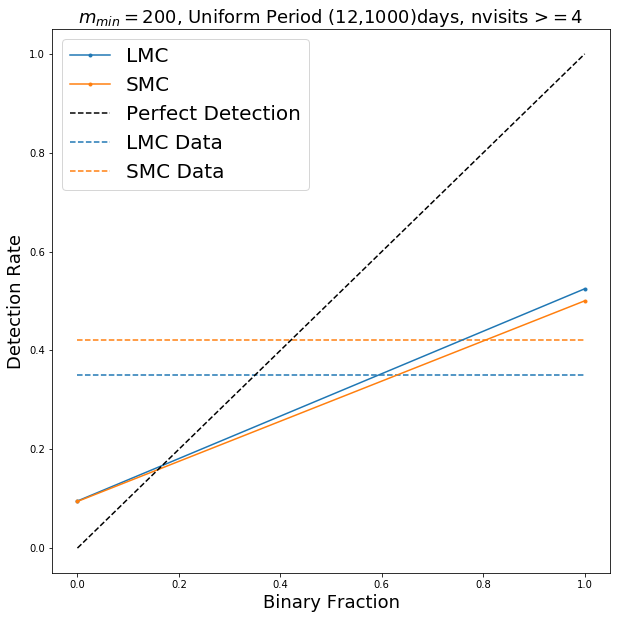

In [16]:
plt.figure(figsize = (10,10))
plt.plot(b_frac, detection_rate_LMC_200_UP,'.-', color = 'C0', label = 'LMC')
plt.hlines(LMC_binary_detection, 0 ,1, color = 'C0', linestyles='dashed', label = 'LMC Data')
plt.plot(b_frac, detection_rate_SMC_200_UP, '.-', color = 'C1', label = 'SMC')
plt.hlines(SMC_binary_detection, 0 ,1, color = 'C1', linestyles='dashed', label = 'SMC Data')
plt.plot([0,1],[0,1],'--', color = 'black',label = 'Perfect Detection')
plt.xlabel('Binary Fraction', size = 18)
plt.ylabel('Detection Rate', size = 18)
plt.title('$m_{min} = 200$, Uniform Period (12,1000)days, nvisits $\greater = 4$', size = 18)
plt.legend(prop = {'size': 20})
plt.show()

In [18]:
AllAvgSimp3, AllVisSimp3 = Tables.nvisits_cut(AllAvg,AllVis,3)
AAS3_RG = Tables.rg_cut(AllAvgSimp3)
AAS3_RG_ISO = Tables.iso_fit(AAS3_RG, ISO)

AllAvg3_LMC = Tables.mc_cut(AAS3_RG_ISO, 'L')
AllAvg3_SMC = Tables.mc_cut(AAS3_RG_ISO, 'S')

AllAvg3_LMC_RV = Tables.rv_table_add(AllAvg3_LMC,AllVisSimp3)
AllAvg3_SMC_RV = Tables.rv_table_add(AllAvg3_SMC,AllVisSimp3)

In [19]:
thing_LMC = Binary_Fraction(AllAvg3_LMC_RV)
thing_SMC = Binary_Fraction(AllAvg3_SMC_RV)

In [20]:
b_frac = np.array([0,1])
detection_rate_LMC_200_UP = []
for i in b_frac:
    p_value_result_LMC_200_UP, binary_result_LMC_200_UP = thing_LMC.Master(200,'U', True, False, i, 50)
    detection_rate_LMC_200_UP.append(np.count_nonzero(binary_result_LMC_200_UP)/len(binary_result_LMC_200_UP))

detection_rate_SMC_200_UP = []
for i in b_frac:
    p_value_result_SMC_200_UP, binary_result_SMC_200_UP = thing_SMC.Master(200, 'U', True, False, i, 50)
    detection_rate_SMC_200_UP.append(np.count_nonzero(binary_result_SMC_200_UP)/len(binary_result_SMC_200_UP))

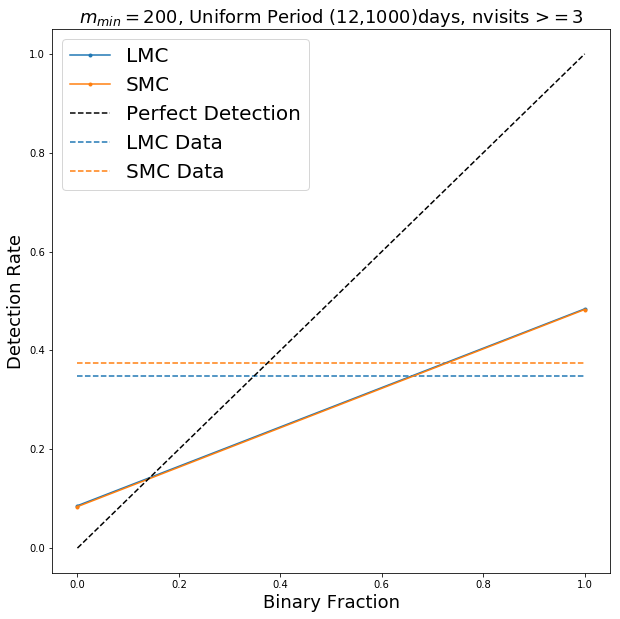

In [21]:
import matplotlib.pyplot as plt
real_data_detection_LMC, binary_bool_LMC = thing_LMC.Real_Data_Fraction()
real_data_detection_SMC, binary_bool_SMC = thing_SMC.Real_Data_Fraction()
LMC_binary_detection = np.count_nonzero(real_data_detection_LMC)/len(real_data_detection_LMC)
SMC_binary_detection = np.count_nonzero(real_data_detection_SMC)/len(real_data_detection_SMC)

plt.figure(figsize = (10,10))
plt.plot(b_frac, detection_rate_LMC_200_UP,'.-', color = 'C0', label = 'LMC')
plt.hlines(LMC_binary_detection, 0 ,1, color = 'C0', linestyles='dashed', label = 'LMC Data')
plt.plot(b_frac, detection_rate_SMC_200_UP, '.-', color = 'C1', label = 'SMC')
plt.hlines(SMC_binary_detection, 0 ,1, color = 'C1', linestyles='dashed', label = 'SMC Data')
plt.plot([0,1],[0,1],'--', color = 'black',label = 'Perfect Detection')
plt.xlabel('Binary Fraction', size = 18)
plt.ylabel('Detection Rate', size = 18)
plt.title('$m_{min} = 200$, Uniform Period (12,1000)days, nvisits $\greater = 3$', size = 18)
plt.legend(prop = {'size': 20})
plt.show()